In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

In [2]:
air=pd.read_csv("C:\\ExcelR\\Assignments\\Assignment 18\\Airlines+Data.csv")

In [3]:
air

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
# As above the Month coloumn is of object data type,we will convert it to DateTime
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")
air["month"] =air.Date.dt.strftime("%b") # month extraction
air['year']=air.Date.dt.strftime('%Y')

<AxesSubplot:xlabel='month', ylabel='year'>

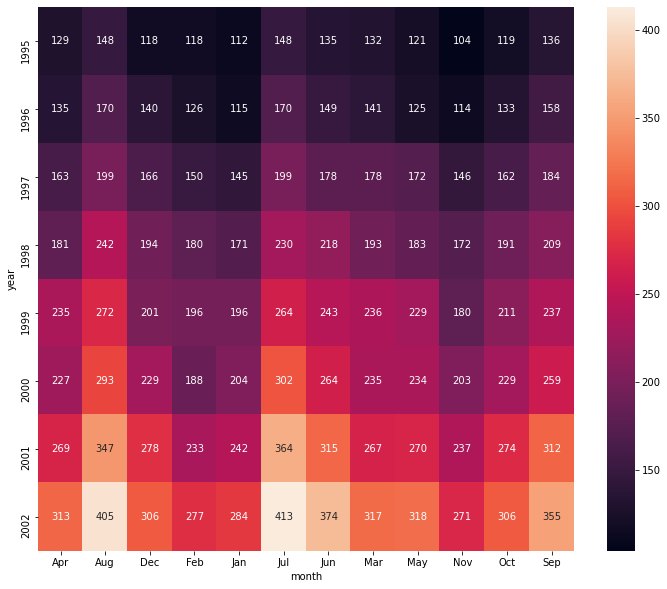

In [6]:
plt.figure(figsize=(12,10))
heatmap=pd.pivot_table(data=air,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap,annot=True,fmt='g')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

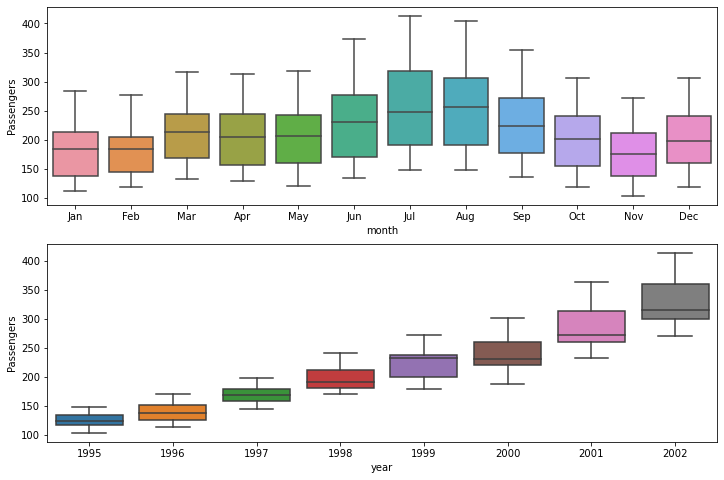

In [7]:
# Boxplot for ever
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

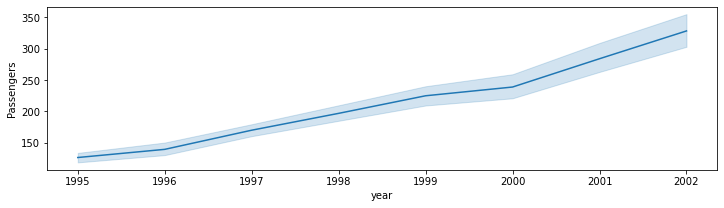

In [8]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=air)

In [9]:
air['t']=np.arange(1,97)
air['t2']=np.square(air.t)
air['log_p']=np.log(air.Passengers)
air

,Month,Passengers,Date,month,year,t,t2,log_p
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812
4,May-95,121,1995-05-01,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,92,8464,6.003887
92,Sep-02,355,2002-09-01,Sep,2002,93,8649,5.872118
93,Oct-02,306,2002-10-01,Oct,2002,94,8836,5.723585
94,Nov-02,271,2002-11-01,Nov,2002,95,9025,5.602119


In [10]:
airs=pd.get_dummies(air.month)

In [11]:
df=[air,airs]
airline=pd.concat(df,axis=1,join='inner')
airline

,Month,Passengers,Date,month,year,t,t2,log_p,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,2002-11-01,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


## Creating different models and computing there RMSE(Root Mean Square Error) for best Forcasting model

In [12]:
train=airline.head(80)
test=airline.tail(15)

In [13]:
#Linear Model

linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.46873238788137

In [14]:
#Exponential

Exp=smf.ols('log_p~t',data=train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

44.99113596142447

In [15]:
#Quadratic 

Quad=smf.ols('Passengers~t+t2',data=train).fit()
pred_Quad=pd.Series(Quad.predict(test[["t","t2"]]))
rmse_Quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

44.85054402188595

In [16]:
#Additive seasonality 

add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.17179836641685

In [17]:
#Additive Seasonality Quadratic 

add_sea_Quad=smf.ols('Passengers~t+t2+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t2']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.332108697872243

In [18]:
##Multiplicative Seasonality

Mul_sea=smf.ols('log_p~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =train).fit()
pred_Mult_sea=pd.Series(Mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_Mult_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

136.31032365890496

In [19]:
#Multiplicative Additive Seasonality 

Mul_Add_sea=smf.ols('log_p~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_Mult_add_sea=pd.Series(Mul_Add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]))
rmse_Mult_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.704722827234141

In [20]:
#Multiplicative Quadratic  Seasonality 

Mul_Add_sea=smf.ols('log_p~t+t2+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_Mult_add_sea_quad=pd.Series(Mul_Add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t2']]))
rmse_Mult_add_sea_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad 

23.497498704679206

In [21]:
#Compare the results 

d={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea","rmse_Mult_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_add_sea_quad])}
table_rmse=pd.DataFrame(d)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.704723
7,rmse_Mult_add_sea_quad,23.497499
4,rmse_add_sea_quad,24.332109
2,rmse_Quad,44.850544
1,rmse_Exp,44.991136
0,rmse_linear,48.468732
3,rmse_add_sea,130.171798
5,rmse_Mult_sea,136.310324


# Final Forcasting Model

In [22]:
#Build the model on entire data set
model_full = smf.ols('log_p~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=airline).fit()

In [23]:
forcasted_Passengers=pd.Series(model_full.predict(airline[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]))
forcasted_Passengers

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [24]:
#RMSE
RMSE=np.sqrt(np.mean((np.array(air['Passengers'])-np.array(np.exp(forcasted_Passengers)))**2))
RMSE 

8.933548467712583

In [25]:
air['Forcasted']=np.exp(forcasted_Passengers)
air

,Month,Passengers,Date,month,year,t,t2,log_p,Forcasted
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499,109.176148
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685,110.331245
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802,127.315234
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812,123.200587
4,May-95,121,1995-05-01,May,1995,5,25,4.795791,122.399578
...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,92,8464,6.003887,394.784174
92,Sep-02,355,2002-09-01,Sep,2002,93,8649,5.872118,353.576683
93,Oct-02,306,2002-10-01,Oct,2002,94,8836,5.723585,310.439400
94,Nov-02,271,2002-11-01,Nov,2002,95,9025,5.602119,272.472660


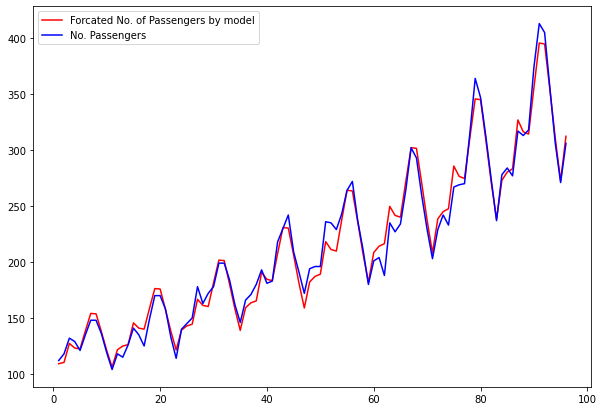

In [26]:
plt.figure(figsize=(10,7))
plt.plot(air.t,air.Forcasted,color='red',label='Forcated No. of Passengers by model')
plt.plot(air.t,air.Passengers,color='blue',label='No. Passengers')
plt.legend()
plt.show()